In [1]:
import pandas as pd

In [2]:
# Load files into a pandas dataframe
train_values = pd.read_csv('./train_values.csv')
train_labels = pd.read_csv('./train_labels.csv')
test_values = pd.read_csv('./test_values.csv')
submission_format = pd.read_csv('../submission_format (1).csv')

In [3]:
merged_train = pd.merge(train_values, train_labels, on='building_id')

In [4]:
# Combining trained values with test values
combined_data = pd.concat([merged_train, test_values], ignore_index=True)
combined_data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3.0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2.0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3.0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2.0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347464,310028,4,605,3623,3,70,20,6,t,r,...,0,0,0,0,0,0,0,0,0,NaN
347465,663567,10,1407,11907,3,25,6,7,n,r,...,0,0,0,0,0,0,0,0,0,NaN
347466,1049160,22,1136,7712,1,50,3,3,t,r,...,0,0,0,0,0,0,0,0,0,NaN
347467,442785,6,1041,912,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,NaN


# Data Exploration and Cleaning

In [5]:
print(combined_data.head())
combined_data.dtypes

   building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...         

building_id                                 int64
geo_level_1_id                              int64
geo_level_2_id                              int64
geo_level_3_id                              int64
count_floors_pre_eq                         int64
age                                         int64
area_percentage                             int64
height_percentage                           int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


In [6]:
combined_data[['building_id','damage_grade']]
# test_values.columns

,building_id,damage_grade
0,802906,3.0
1,28830,2.0
2,94947,3.0
3,590882,2.0
4,201944,3.0
...,...,...
347464,310028,NaN
347465,663567,NaN
347466,1049160,NaN
347467,442785,NaN


In [7]:
combined_data.isna().sum()

building_id                                   0
geo_level_1_id                                0
geo_level_2_id                                0
geo_level_3_id                                0
count_floors_pre_eq                           0
age                                           0
area_percentage                               0
height_percentage                             0
land_surface_condition                        0
foundation_type                               0
roof_type                                     0
ground_floor_type                             0
other_floor_type                              0
position                                      0
plan_configuration                            0
has_superstructure_adobe_mud                  0
has_superstructure_mud_mortar_stone           0
has_superstructure_stone_flag                 0
has_superstructure_cement_mortar_stone        0
has_superstructure_mud_mortar_brick           0
has_superstructure_cement_mortar_brick  

In [8]:
# Check for duplicates
duplicates = combined_data.duplicated()
print(duplicates.sum())

0


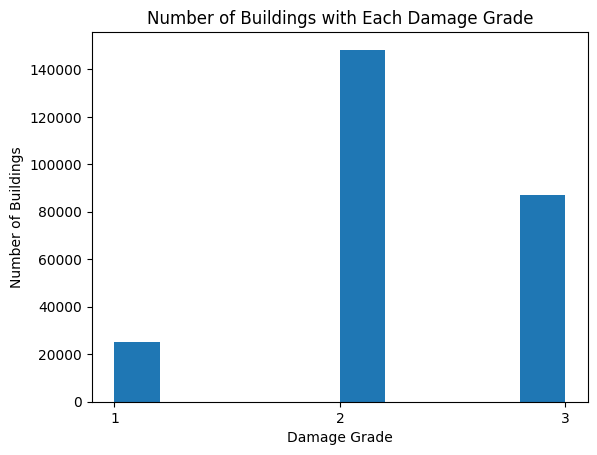

In [9]:
# Visualizing most damaged levels
import matplotlib.pyplot as plt

damage = combined_data['damage_grade']

plt.hist(damage)
plt.title('Number of Buildings with Each Damage Grade')
plt.xlabel('Damage Grade')
plt.xticks([1,2,3],['1','2','3'])
plt.ylabel('Number of Buildings')

plt.show()

In [10]:
print('It appears most buildings experienced level 2 damage')

It appears most buildings experienced level 2 damage


In [11]:
# Trying to see which features are objects
combined_data.select_dtypes(include=['object'])

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v
...,...,...,...,...,...,...,...,...
347464,t,r,q,f,q,t,d,w
347465,n,r,n,f,q,s,d,v
347466,t,r,n,f,j,s,d,v
347467,t,r,n,f,q,s,d,a


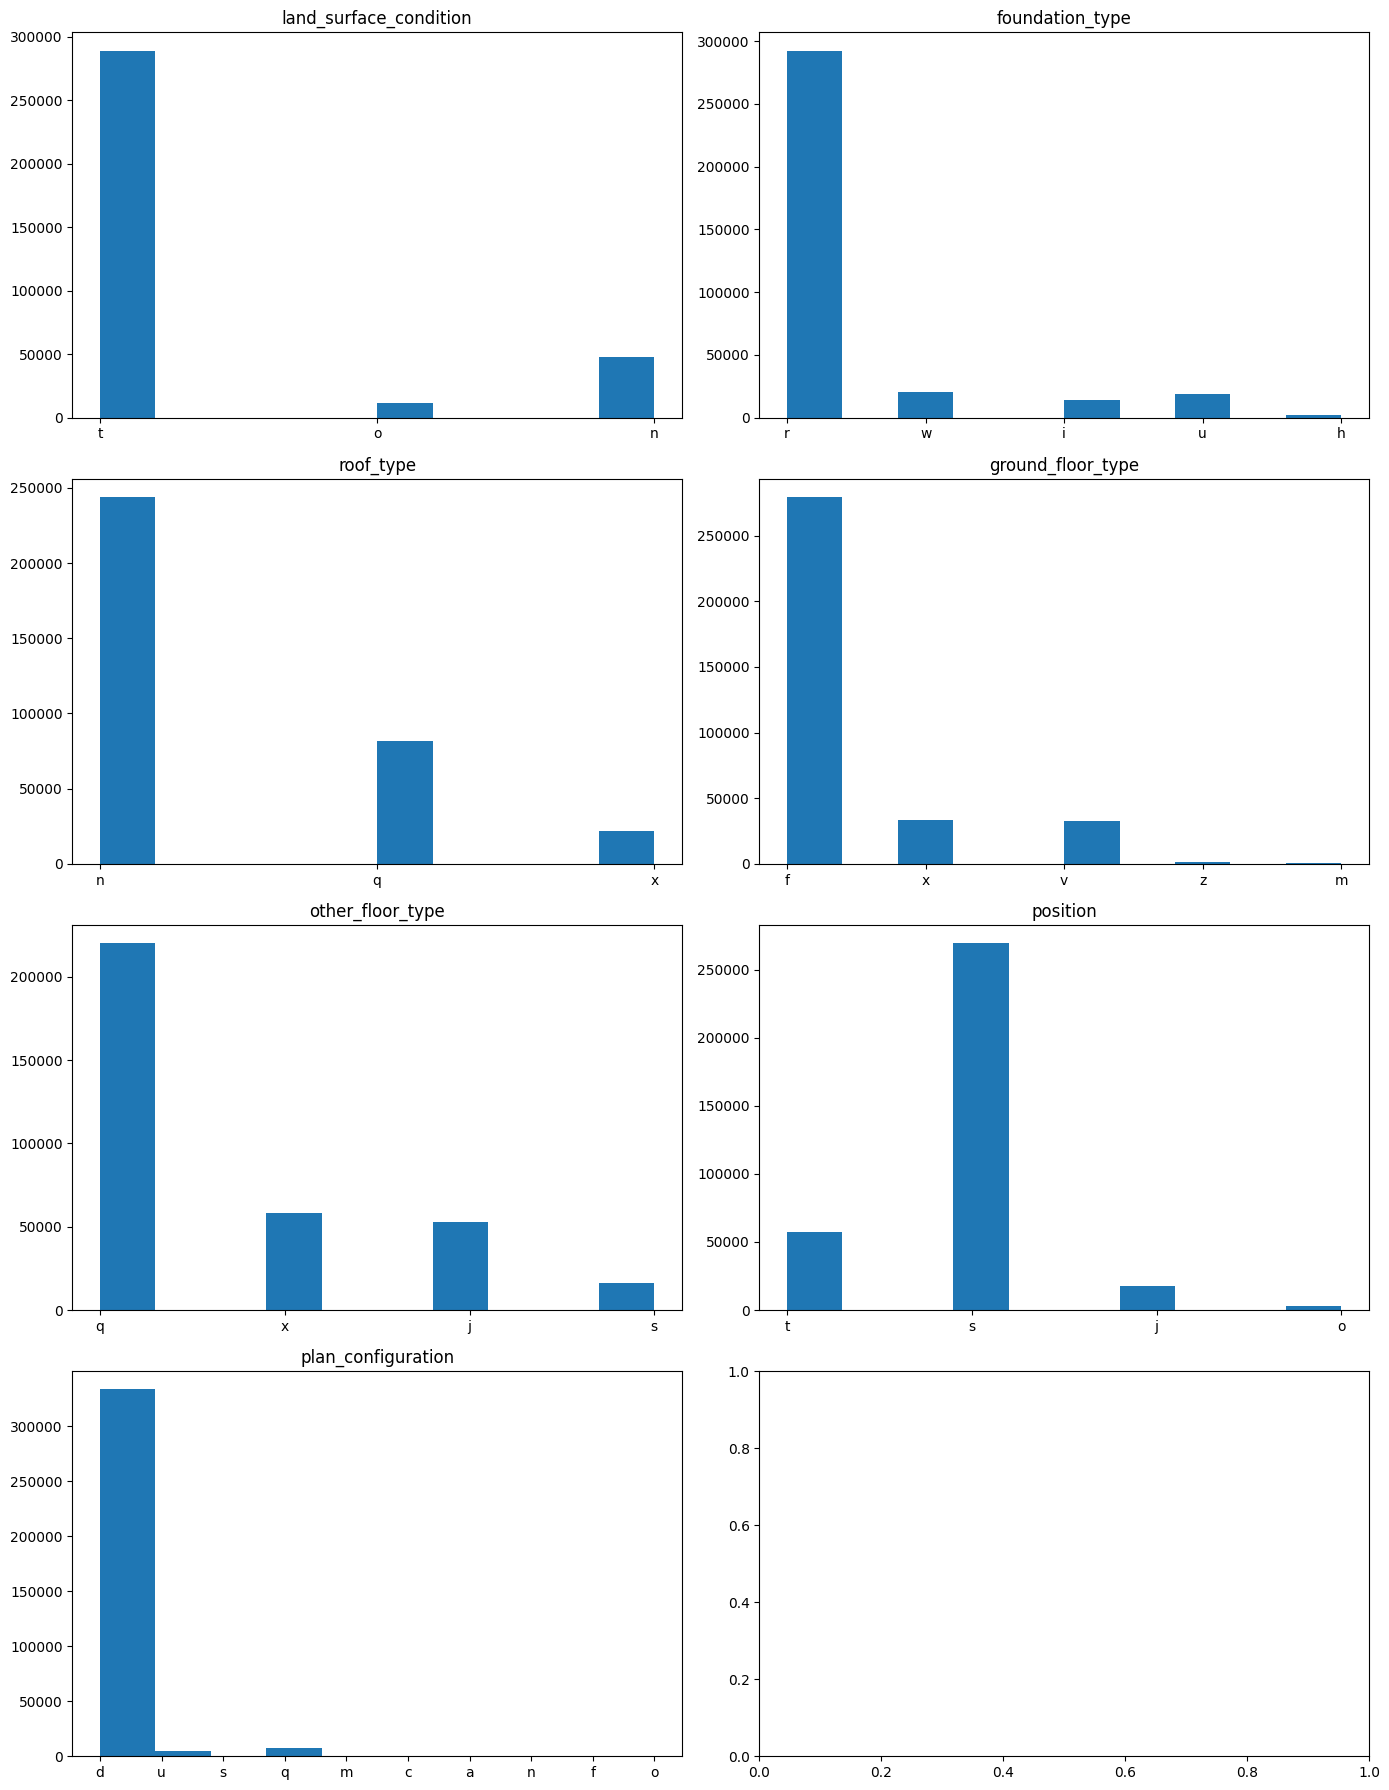

In [12]:
import matplotlib.pyplot as plt

# Creating a figure and axis for each variable
fig, axs = plt.subplots(4, 2, figsize=(14, 18))  # 4 rows, 2 columns

# Flatten the axis array for easier iteration
axs = axs.flatten()

# Plotting each variable as a histogram
variables = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type',
             'other_floor_type', 'position', 'plan_configuration']

for i, var in enumerate(variables):
    axs[i].hist(combined_data[var])
    axs[i].set_title(var)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [13]:
print('Since there are ascii variables, histograms were used to see which variable category appeared most frequently')

Since there are ascii variables, histograms were used to see which variable category appeared most frequently


# Preprocessing Data

First, we need to hot_encode the variables; including the ascii ones

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Initialize label encoder and one-hot encoder
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False to get a non-sparse matrix

# Create a copy of the DataFrame to avoid modifying the original DataFrame within the loop
combined_data_encoded = combined_data.copy()
combined_data_encoded = combined_data_encoded.drop(columns=['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'])

# Iterate over each categorical variable and apply encoding
for column in combined_data.columns:
    if combined_data[column].dtype == 'object':  # Check if the column is categorical
        # Use label encoding
        combined_data_encoded[column + '_label_encoded'] = label_encoder.fit_transform(combined_data[column])

        # Use one-hot encoding
        one_hot_encoded_array = one_hot_encoder.fit_transform(combined_data_encoded[[column]])
        one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=[f"{column}_{int(i)}" for i in range(one_hot_encoded_array.shape[1])])
        combined_data_encoded = pd.concat([combined_data_encoded, one_hot_encoded_df], axis=1)

        # Drop the original categorical column and the label encoded column
        combined_data_encoded.drop([column, column + '_label_encoded'], axis=1, inplace=True)

# Now merged_train_encoded should have all categorical variables replaced with one-hot encoded columns
combined_data2 = combined_data_encoded

In [15]:
# Adding back columns
columns_to_add_back = combined_data[['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']]

# Concatenate the extracted columns to the front of merged_train
combined_data = pd.concat([columns_to_add_back, combined_data_encoded], axis=1)

# Cleaned Data
combined_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_4,plan_configuration_5,plan_configuration_6,plan_configuration_7,plan_configuration_8,plan_configuration_9,legal_ownership_status_0,legal_ownership_status_1,legal_ownership_status_2,legal_ownership_status_3
0,802906,6,487,12198,2,30,6,5,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28830,8,900,2812,2,10,8,7,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,94947,21,363,8973,2,10,5,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,590882,22,418,10694,2,10,6,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,201944,11,131,1488,3,30,8,9,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Creating a new feature
combined_data['volume'] = combined_data['area_percentage'] * combined_data['height_percentage']

combined_data['damage_grade']

0         3.0
1         2.0
2         3.0
3         2.0
4         3.0
         ... 
347464    NaN
347465    NaN
347466    NaN
347467    NaN
347468    NaN
Name: damage_grade, Length: 347469, dtype: float64

Using ensemble methods for optimal feature selection

# Train/Test Split 

In [17]:
# Split the data into training and testing sets
train_data = combined_data[combined_data['damage_grade'].notnull()]
test_data = combined_data[combined_data['damage_grade'].isnull()]

In [18]:
# Training the model, using Train_data. Will use Test Data to find damage_grade after 

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Ensure 'damage_grade' is treated as categorical
train_data['damage_grade']= train_data['damage_grade'].astype(int).astype('category')

# Training set
X = train_data.drop(columns=['damage_grade'])
y = train_data['damage_grade']



/var/folders/93/r_nbn0pj2jb1d097mhf6q5ww0000gn/T/ipykernel_72074/3175756518.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['damage_grade']= train_data['damage_grade'].astype(int).astype('category')


In [19]:
y.head()

0    3
1    2
2    3
3    2
4    3
Name: damage_grade, dtype: category
Categories (3, int64): [1, 2, 3]

# Trying with Catboost 

In [22]:
pip install catboost --find-links https://catboost.ai/download/


Looking in links: https://catboost.ai/download/
  Using cached catboost-1.2.5.tar.gz (69.6 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for catboost (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [371 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-310
      creating build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/monoforest.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/plot_helpers.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/metrics.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/carry.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/version.py -> build/l

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Upgrade pip, setuptools, and wheel
!pip install --upgrade pip setuptools wheel

# Install CatBoost
!pip install catboost

# If needed, use verbose mode for installation
!pip install --verbose catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.7 MB/s eta 0:00:00a 0:00:01
  Using cached setuptools-72.1.0-py3-none-any.whl (2.3 MB)
  Using cached wheel-0.43.0-py3-none-any.whl (65 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.38.4
    Uninstalling wheel-0.38.4:
      Successfully uninstalled wheel-0.38.4
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.6.3
    Uninstalling setuptools-65.6.3:
      Successfully uninstalled setuptools-65.6.3
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.4.1 requires pyqtwebengine<5.16, which is not installed.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.4 which is incompatible.
cond

In [26]:
import catboost
print(f"CatBoost version: {catboost.__version__}")

CatBoost version: 1.2.5


In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X and y are your features and target variables
# Use a smaller sample for initial feature selection
sample_size = 5000  # Adjust the sample size as needed
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_size, stratify=y, random_state=42)

# USING RFECV TO FIND BEST FEATURES, USED STEP TO ALLOW MORE FEATURES
def perform_rfecv(estimator, X_sample, y_sample, cv_folds=3, step=0.2, min_features_to_select=5):
    # Initialize RFECV with increased step size and minimum features to select
    rfecv = RFECV(estimator=estimator, step=step, cv=StratifiedKFold(cv_folds), scoring='f1_micro', n_jobs=-1, min_features_to_select=min_features_to_select)
    
    # Fit RFECV on the sample
    rfecv.fit(X_sample, y_sample)

    # Get the optimal number of features
    optimal_num_features = rfecv.n_features_
    print(f"Optimal number of features: {optimal_num_features}")

    # Get the feature rankings
    feature_ranking = pd.DataFrame({
        'Feature': X_sample.columns,
        'Ranking': rfecv.ranking_
    }).sort_values(by='Ranking')

    # Get the selected features
    selected_features = feature_ranking[feature_ranking['Ranking'] == 1]['Feature'].tolist()
    print(f"Selected features: {selected_features}")

    # Print the rankings of all features
    print(feature_ranking)

    # Return selected features, feature ranking, and the RFECV object
    return selected_features, rfecv.ranking_, rfecv

# CatBoost (Boosting)
print("CatBoost Feature Selection (Boosting)")
catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, silent=True)
selected_features_catboost, feature_ranking_catboost, rfecv_catboost = perform_rfecv(catboost, X_sample, y_sample, cv_folds=3, step=0.2, min_features_to_select=5)

# Cross-validation for CatBoost with selected features
print("Cross-validation for CatBoost with selected features")
X_selected_catboost = X.loc[:, selected_features_catboost]
cross_val_scores_catboost = cross_val_score(catboost, X_selected_catboost, y, cv=StratifiedKFold(5), scoring='f1_micro', n_jobs=-1)
print(f"CatBoost cross-validation accuracy: {cross_val_scores_catboost.mean()}")


CatBoost Feature Selection (Boosting)
Optimal number of features: 42
Selected features: ['building_id', 'foundation_type_1', 'foundation_type_2', 'foundation_type_3', 'foundation_type_4', 'roof_type_0', 'roof_type_1', 'roof_type_2', 'ground_floor_type_0', 'ground_floor_type_2', 'land_surface_condition_2', 'ground_floor_type_3', 'other_floor_type_1', 'other_floor_type_3', 'position_0', 'position_2', 'position_3', 'plan_configuration_2', 'plan_configuration_7', 'plan_configuration_9', 'legal_ownership_status_2', 'other_floor_type_0', 'land_surface_condition_0', 'volume', 'has_secondary_use', 'has_superstructure_mud_mortar_brick', 'has_superstructure_adobe_mud', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'height_percentage', 'count_families', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_secondary_use_agriculture', 'age', 'count_floors_pre_eq', 'geo_level_3_id', 

In [30]:
X_selected_catboost.columns

Index(['building_id', 'foundation_type_1', 'foundation_type_2',
       'foundation_type_3', 'foundation_type_4', 'roof_type_0', 'roof_type_1',
       'roof_type_2', 'ground_floor_type_0', 'ground_floor_type_2',
       'land_surface_condition_2', 'ground_floor_type_3', 'other_floor_type_1',
       'other_floor_type_3', 'position_0', 'position_2', 'position_3',
       'plan_configuration_2', 'plan_configuration_7', 'plan_configuration_9',
       'legal_ownership_status_2', 'other_floor_type_0',
       'land_surface_condition_0', 'volume', 'has_secondary_use',
       'has_superstructure_mud_mortar_brick', 'has_superstructure_adobe_mud',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'height_percentage', 'count_families',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_secondary_use_agriculture', 'age', 'count_floors_pre_eq',
       'g

In [31]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
from catboost import CatBoostClassifier

# Create a CatBoost model with reduced complexity
catboost_reduced = CatBoostClassifier(
    iterations=30,           # Reduce the number of boosting iterations
    learning_rate=0.1,       # Adjust the learning rate
    depth=5,                 # Reduce the depth of trees
    random_state=42,
    silent=True
)

# Fit the model with the selected features
catboost_reduced.fit(X_selected_catboost, y)

# Predict and evaluate the model on the training data
y_train_pred_catboost_reduced = catboost_reduced.predict(X_selected_catboost)
print("Reduced Complexity Train Set Accuracy:", accuracy_score(y, y_train_pred_catboost_reduced))

# Cross-validation
cross_val_scores_catboost_reduced = cross_val_score(catboost_reduced, X_selected_catboost, y, cv=StratifiedKFold(5), scoring='f1_micro', n_jobs=-1)
print(f"Cross-validation accuracy with reduced complexity: {cross_val_scores_catboost_reduced.mean()}")

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_selected_catboost, y, test_size=0.2, stratify=y, random_state=42)

# Predictions for the test set
y_test_pred_catboost_reduced = catboost_reduced.predict(X_test)
y_pred_prob_catboost_reduced = catboost_reduced.predict_proba(X_test)

# Evaluation
print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_catboost_reduced))

print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_catboost_reduced))

test_accuracy_catboost_reduced = accuracy_score(y_test, y_test_pred_catboost_reduced)
print("Test Set Accuracy:", test_accuracy_catboost_reduced)

# Calculate and print AIC
def AIC_score(y_true, y_pred_prob, df):
    ll = log_loss(y_true, y_pred_prob)
    n = len(y_true)
    aic = 2 * df - 2 * (-n * ll)
    return aic

aic_value_catboost_reduced = AIC_score(y_test, y_pred_prob_catboost_reduced, df=X_test.shape[1] + 1)
print('AIC with Reduced Complexity (CatBoost):', aic_value_catboost_reduced)


Reduced Complexity Train Set Accuracy: 0.650354373160502
Cross-validation accuracy with reduced complexity: 0.6494027116458142
Test Set Confusion Matrix:
[[ 1397  3603    25]
 [  783 27391  1478]
 [   18 12299  5127]]
Test Set Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.28      0.39      5025
           2       0.63      0.92      0.75     29652
           3       0.77      0.29      0.43     17444

    accuracy                           0.65     52121
   macro avg       0.68      0.50      0.52     52121
weighted avg       0.68      0.65      0.61     52121

Test Set Accuracy: 0.6506974156290171
AIC with Reduced Complexity (CatBoost): 76970.45512486088


In [32]:

# Select the same columns in test_data as in X_selected_rf using .loc
test_data_selected = test_data.loc[:, X_selected_catboost.columns]

# Append the damage_grade column to the end using .loc
test_data_selected.loc[:, 'damage_grade'] = test_data['damage_grade']


# test_data_selected.head()
X_selected_catboost.head()


,building_id,foundation_type_1,foundation_type_2,foundation_type_3,foundation_type_4,roof_type_0,roof_type_1,roof_type_2,ground_floor_type_0,ground_floor_type_2,...,count_families,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_secondary_use_agriculture,age,count_floors_pre_eq,geo_level_3_id,geo_level_2_id,geo_level_1_id,area_percentage
0,802906,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,1,0,0,30,2,12198,487,6,6
1,28830,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,10,2,2812,900,8,8
2,94947,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,1,0,0,10,2,8973,363,21,5
3,590882,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,1,0,0,10,2,10694,418,22,6
4,201944,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,0,0,0,30,3,1488,131,11,8


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
from catboost import CatBoostClassifier

X_selected_catboost
y = train_data['damage_grade']


# Train the CatBoost model using the selected features from the training set
catboost_model = CatBoostClassifier(
    iterations=100,           # Number of boosting iterations
    learning_rate=0.1,        # Learning rate
    depth=6,                  # Depth of trees
    random_state=42,
    silent=True
)
catboost_model.fit(X_selected_catboost, y)

# Predict the labels for the training data
y_train_pred_catboost = catboost_model.predict(X_selected_catboost)

# Confusion matrix and classification report for the train set
print("CatBoost Train Set Confusion Matrix:")
print(confusion_matrix(y, y_train_pred_catboost))

print("CatBoost Train Set Classification Report:")
print(classification_report(y, y_train_pred_catboost))

# Calculate and print the accuracy for the train set
train_accuracy_catboost = accuracy_score(y, y_train_pred_catboost)
print("CatBoost Train Set Accuracy:", train_accuracy_catboost)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_catboost, y, test_size=0.2, stratify=y, random_state=42)

# Predict and evaluate the CatBoost model on the test set
y_test_pred_catboost = catboost_model.predict(X_test)
y_pred_prob_catboost = catboost_model.predict_proba(X_test)

print("CatBoost Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_catboost))

print("CatBoost Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_catboost))

# Calculate and print the accuracy for the test set
test_accuracy_catboost = accuracy_score(y_test, y_test_pred_catboost)
print("CatBoost Test Set Accuracy:", test_accuracy_catboost)

# Calculate and print AIC for CatBoost
def AIC_score(y_true, y_pred_prob, df):
    ll = log_loss(y_true, y_pred_prob)
    n = len(y_true)
    aic = 2 * df - 2 * (-n * ll)
    return aic

aic_value_catboost = AIC_score(y_test, y_pred_prob_catboost, df=X_test.shape[1] + 1)
print('CatBoost AIC:', aic_value_catboost)


CatBoost Train Set Confusion Matrix:
[[  9277  15599    248]
 [  4892 127356  16011]
 [   253  45256  41709]]
CatBoost Train Set Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.37      0.47     25124
           2       0.68      0.86      0.76    148259
           3       0.72      0.48      0.57     87218

    accuracy                           0.68    260601
   macro avg       0.68      0.57      0.60    260601
weighted avg       0.69      0.68      0.67    260601

CatBoost Train Set Accuracy: 0.6843488704955084
CatBoost Test Set Confusion Matrix:
[[ 1875  3104    46]
 [  993 25486  3173]
 [   45  8986  8413]]
CatBoost Test Set Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.37      0.47      5025
           2       0.68      0.86      0.76     29652
           3       0.72      0.48      0.58     17444

    accuracy                           0.69     52121
   mac

In [43]:
# y_test.shape
y_train_pred_catboost

array([[2],
       [2],
       [3],
       ...,
       [3],
       [2],
       [3]])

In [53]:
import pandas as pd

# Remove the target column from the test set
test_data_features_only = test_data[X_selected_catboost.columns]

# Predict the labels for the test set using the trained CatBoost model
y_test_pred = catboost_model.predict(test_data_features_only)

# Create a Series from predictions
y_test_pred_series = pd.Series(y_test_pred_flattened)

# Count occurrences of each class
class_counts = y_test_pred_series.value_counts().sort_index()

# Print the Series showing the number of occurrences for each class
print(class_counts)


1     4814
2    62459
3    19595
Name: count, dtype: int64


In [55]:

y_pred = y_test_pred  # Predictions
building_ids = test_data.building_id 

# Flatten y_pred if it's not already 1-dimensional
y_pred_flattened = y_pred.ravel() if y_pred.ndim > 1 else y_pred

# Create DataFrame with building_id and predicted values
predictions_df = pd.DataFrame({
    'building_id': building_ids,
    'damage_grade': y_pred_flattened
})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

print('Predictions saved to predictions.csv')


Predictions saved to predictions.csv


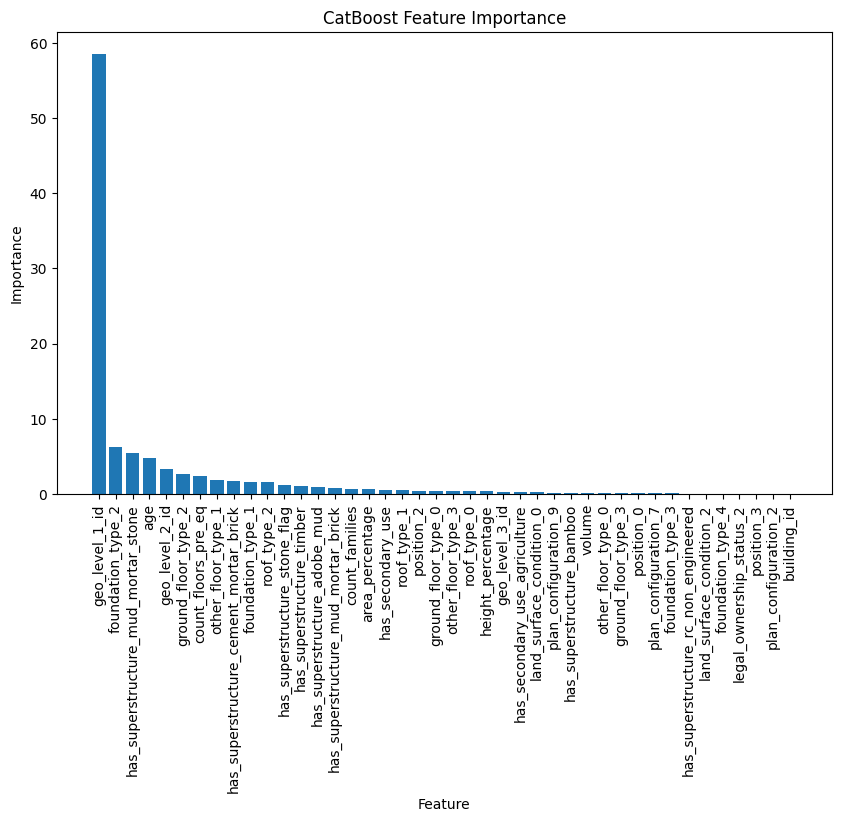

In [56]:
import matplotlib.pyplot as plt

# Get the feature importances
importances = catboost_model.feature_importances_

# Get the names of the features
feature_names = X_selected_catboost.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('CatBoost Feature Importance')
plt.show()